# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [1]:
# ファイルをダウンロードする
!wget https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!wget https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!wget https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

--2024-12-06 14:22:07--  https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 158711 (155K) [application/zip]
`794_ruby_4237.zip.2' に保存中

794_ruby_4237.zip.2 100%[===================>] 154.99K  --.-KB/s 時間 0.1s       

2024-12-06 14:22:07 (1.06 MB/s) - `794_ruby_4237.zip.2' へ保存完了 [158711/158711]

--2024-12-06 14:22:08--  https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 202267 (198K) [application/zip]
`1746_ruby_18324.zip.2' に保存中

1746_ruby_18324.zip 100%[===================>] 197.53K  --.-KB/s 時間 0.04s      

2024-12-06 14:22:08 (4.96 MB/s) - `1746_ruby_18324.zip.2' へ保存完了 [202267/202267]

--2024

In [2]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [5]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [6]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [7]:
input_file = "text/sanshiro.stripruby.txt"
output_file = "text/sanshiro.corpus.txt"

with open(input_file, "r", encoding="utf-8") as fin:
    lines = fin.readlines()

# 跳过前21行，去掉最后14行
lines = lines[21:-14]

with open(output_file, "w", encoding="utf-8") as fout:
    fout.writelines(lines)


In [8]:
input_file = "text/mon.stripruby.txt"
output_file = "text/mon.corpus.txt"

# 打开输入文件并读取所有行
with open(input_file, "r", encoding="utf-8") as fin:
    lines = fin.readlines()

# 跳过前 17 行，并移除最后 14 行
lines = lines[17:-14]

# 写入处理后的行到输出文件
with open(output_file, "w", encoding="utf-8") as fout:
    fout.writelines(lines)


In [9]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

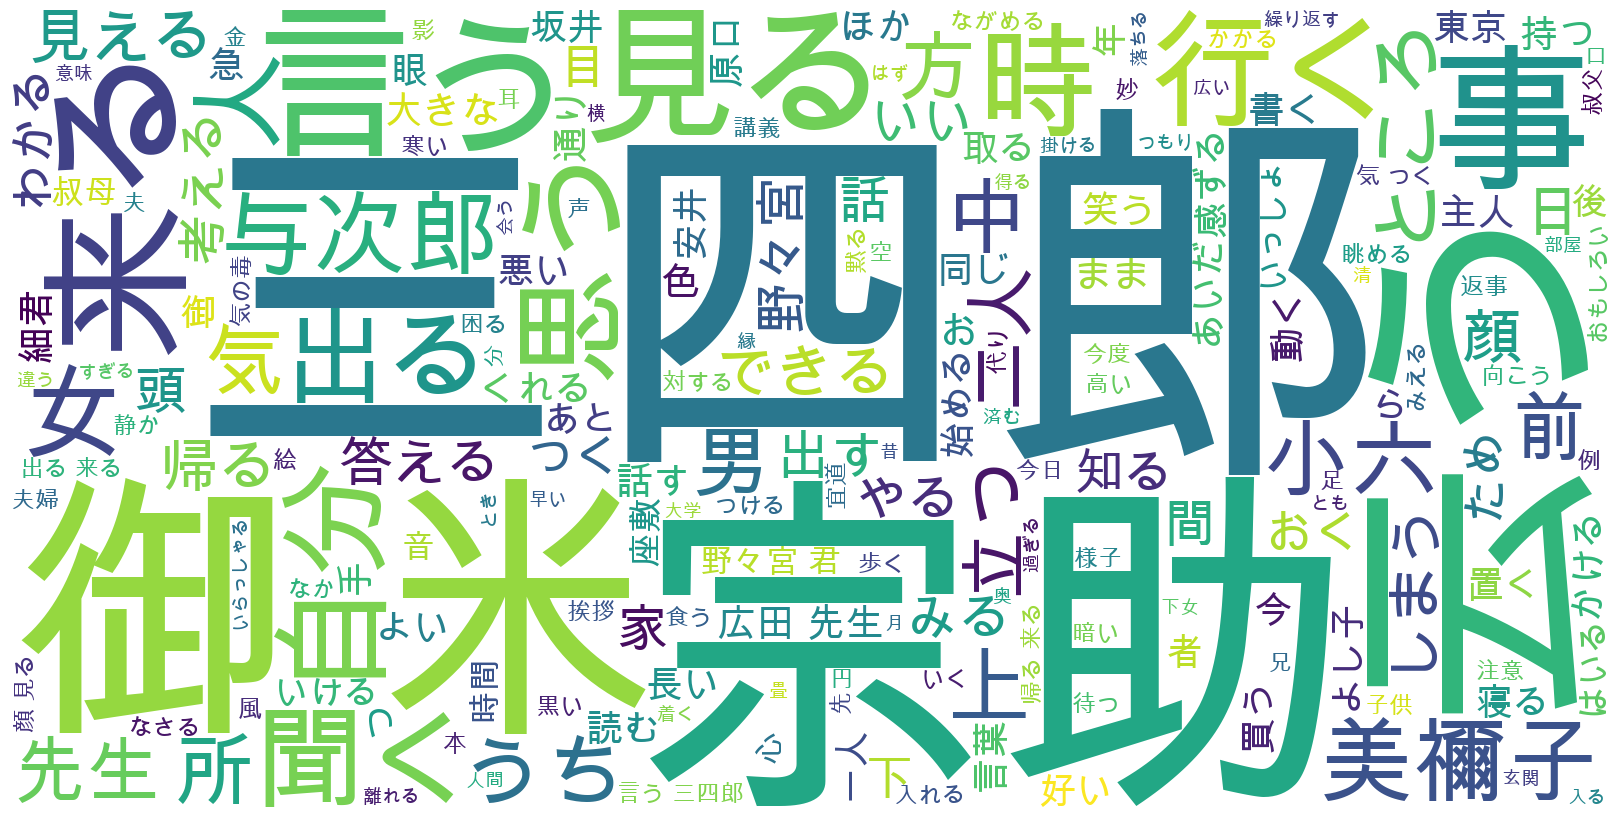

In [10]:
# your code goes here
# 必要なライブラリをインポート
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sys

# 日本語モデルをロード
nlp = spacy.load("ja_ginza")

# 統合されたコーパスを読み込む
input_fn = "text/all.corpus.txt"

# すべてのトークンを分析
all_tokens = []
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)

# 分析対象とする品詞と除外する語（ストップワード）を指定
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

# 単語リストを取得
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

# フォントパスを設定
if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

# ワードクラウドを作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", 
    font_path=fpath
).generate(' '.join(words))

# ワードクラウドを表示
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud_trilogy.png", dpi=300)
plt.show()

## 共起ネットワーク

In [11]:
# 必要なライブラリのインポート
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

# 日本語モデルをロード
nlp = spacy.load("ja_ginza")

# コーパスを読み込む
input_fn = "text/all.corpus.txt"

# 分析対象とする品詞と除外する語（ストップワード）を指定
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

# 文を準備
sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join([token.lemma_ for token in sent 
               if token.pos_ in include_pos and token.lemma_ not in stopwords]) 
               for sent in doc.sents]
        sents.extend(tmp)

# 共起関係を計算する関数
def count_cooccurrence(sents, token_length="{2,}"):
    """同じ文中に共起する単語を行列形式で列挙する"""
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)
    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)
    X[X > 0] = 1
    Xc = (X.T * X)
    return words, word_counts, Xc, X

# ネットワークを作成する関数
def create_network(words, word_counts, Xc, weight_cutoff):
    """語、単語頻度、共起行列から共起ネットワークを作成"""
    G = nx.Graph()
    
    # ノードの重みを設定
    weights_w = [(word, {"weight": count / word_counts.max()})
                 for word, count in zip(words, word_counts)]
    G.add_nodes_from(weights_w)
    
    # エッジの重みを設定
    weights_c = [(words[i], words[j], Xc[i, j] / Xc.max())
                 for i, j in zip(*Xc.nonzero()) 
                 if i < j and Xc[i, j] > weight_cutoff * Xc.max()]
    G.add_weighted_edges_from(weights_c)
    
    # 孤立したノードを削除
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

# 共起を計算
words, word_counts, Xc, X = count_cooccurrence(sents)

# ネットワークを作成
G = create_network(words, word_counts, Xc, 0.01)

# Pyvisでネットワークを可視化
pyvis_G = Network(width="800px", height="800px", notebook=True, cdn_resources='remote')

# ノードとエッジを追加
for node, attrs in G.nodes(data=True):
    pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
for node1, node2, attrs in G.edges(data=True):
    pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

# 操作ボタンを表示
pyvis_G.show_buttons()

# HTMLファイルとして保存
pyvis_G.show("network_trilogy.html")

network_trilogy.html


## 共起ヒートマップ

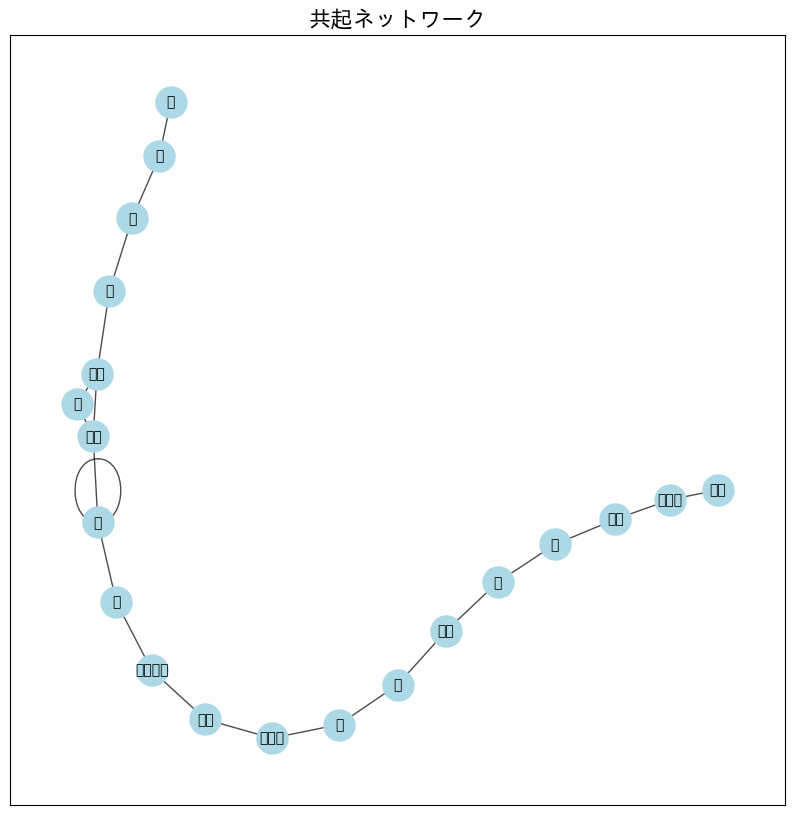

In [15]:
import spacy
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the Japanese NLP model using spaCy and GiNZA
nlp = spacy.load("ja_ginza")

# Sample text for co-occurrence analysis
sample_text = (
    "うとうととして目がさめると女はいつのまにか、隣のじいさんと話を始めている。このじいさんはたしかに前の前の駅から乗ったいなか者である。"
    "発車まぎわに頓狂な声を出して駆け込んで来て、いきなり肌をぬいだと思ったら背中にお灸のあとがいっぱいあったので、三四郎の記憶に残っている。"
)

# Process the text with spaCy
doc = nlp(sample_text)

# Extract nouns and proper nouns for co-occurrence analysis
tokens = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]

# Generate co-occurrence pairs (sliding window of size 2)
window_size = 2
co_occurrences = []
for i in range(len(tokens) - window_size + 1):
    co_occurrences.extend(combinations(tokens[i:i + window_size], 2))

# Count co-occurrence frequencies
co_occurrence_counts = Counter(co_occurrences)

# Create a graph from the co-occurrence data
G = nx.Graph()
for (token1, token2), weight in co_occurrence_counts.items():
    G.add_edge(token1, token2, weight=weight)

# Visualize the co-occurrence network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Positioning for consistent layout
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("共起ネットワーク", fontsize=16)
plt.show()
